### In this notebook I will experiment different techniques to deal with NA values.
### I wiil use the udemy course "Feature Engineering for Machine Learning", from Soledad Galli, for principal references, but will use others sources too.
### I will use the data of the DSA January Competition. There is another repository(WIP) with the project.

In [1]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading data
df = pd.read_csv("Data/dataset_treino.csv")

In [3]:
df.head()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
id                   600 non-null int64
num_gestacoes        600 non-null int64
glicose              600 non-null int64
pressao_sanguinea    600 non-null int64
grossura_pele        600 non-null int64
insulina             600 non-null int64
bmi                  600 non-null float64
indice_historico     600 non-null float64
idade                600 non-null int64
classe               600 non-null int64
dtypes: float64(2), int64(8)
memory usage: 47.0 KB


##### In this case, we can assume that all the NA values was imputed with 0.
##### Except for 'num_gestacoes', to have a 0 for min value is impossible for a living human been, so, I will assume 0 as NA value.

##### Starting with 'glicose'.
##### Condn't find any relationship whith other features that explain the missing values,
##### The same with some other information not present in the dataset. In this case, I will assume that the features has
##### missing data completely at random(MCAR).

In [6]:
df[df['glicose'] == 0]

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
75,76,1,0,48,20,0,24.7,0.140,22,0
182,183,1,0,74,20,23,27.7,0.299,21,0
342,343,1,0,68,35,0,32.0,0.389,22,0
349,350,5,0,80,32,0,41.0,0.346,37,1
502,503,6,0,68,41,0,39.0,0.727,41,1


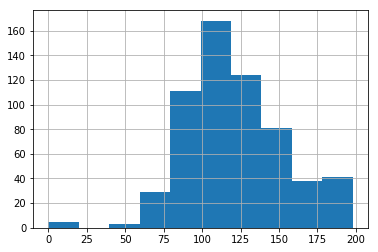

In [7]:
df['glicose'].hist()

#####  For a feature assumed MCAR, mean/median imputation is an option. As we could observe a (almost)gaussian distribution, the mean is a better choice

In [8]:
df['glicose'].mean()

120.135

In [9]:
df['glicose_NAtoMean'] = df['glicose'].replace(to_replace = 0, value = df['glicose'].mean())

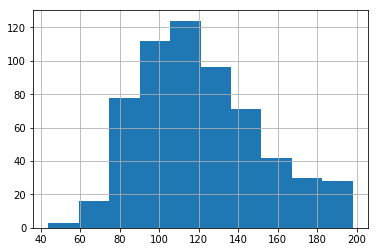

In [10]:
df['glicose_NAtoMean'].hist()